
# Gaussian process: An Introductory tutorial in Python 

by: __Charles I. Saidu__ - [web page](https://charlesity.github.io)

_Latest update:_ October 2020

If you wish to cite this tutorial:

```
% Requires \usepackage{url} in preamble
@misc{CharlesityTutorials,
 author = {Charles Isah Saidu},
 title = {Gaussian process introductory tutorial in Python},
 url = {http://charlesity.github.io/talks/CIS_GP_tutorial.html}, 
 howpublished = {\url{http://charlesity.github.io/talks/CIS_GP_tutorial.html}},
 originalyear = {2020},
 lastchecked = {}
}
```

# Part 0: Recap - Probability Density Functions 

## Probabiltity Density Function

This is a function $f(x)$ of a continuous random variable $X$, whose integral across an interval gives the probability that the value of the variable lies within the same interval.

$$
    p(a \leq X \leq b) = \int_a^b f(x)dx
$$

### Note:
1. $f(x)\ge0$   
2. $f(x)$ in itself is **not** a probability for continous random variables! However, it is a **density** you integrate to get a probability
3. For valid probability, $p(-\infty \le X \le + \infty )  = \int_a^b f(x)dx = 1$
4. $p(X = x) = 0$

# Part 1: Univariate Gaussian Distribution 

Gaussian distribution is a probability distribution that is **symmetric** about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. 
 
Its **probability density function** is given by
$$
  f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{ - \frac{1}{2} \left(\frac{\mu-x}{\sigma}\right)^2}
$$
This distribution is parameterized by **mean** $\mu$ and standard **standard deviation** $\sigma$

Notation is written as $X \sim \mathcal{N}(\mu, \sigma^2)$


## Visualization of Univariate Gaussian

Interactive visualization of two univariate gaussian distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = [8, 10]

In [2]:
def univariate_pdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-.5 * (x-mu)**2/sigma**2)

def plot_univariate_guassian(mu1,sigma1):
    x = np.linspace(-10,10, 100)
    plt.plot(x,univariate_pdf(x, mu1, sigma1), label = '($\mu$ = %s, $\sigma$ = %s)'%(mu1, sigma1))
    plt.legend()


In [3]:
interact(plot_univariate_guassian,mu1 = widgets.Dropdown(options=np.arange(0,10), value = 0)
         , sigma1 = widgets.Dropdown(options=np.arange(1,100), value = 1))

interactive(children=(Dropdown(description='mu1', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=0), Dropdown(d…

<function __main__.plot_univariate_guassian(mu1, sigma1)>

## Properties Gaussian
1. A scaled gaussian is also gaussian
$$
X \sim \mathcal{N}(0, 1) \text{ then } Z = \sigma X + \mu \text{ is Guassian}  Z \sim \mathcal{N}(\mu, \sigma^2), \\  \text{where } \sigma \in \mathcal{R}^+, \mu \in \mathcal{R}
$$

### Lets see a proof by pictures

Consider 1000 random normal draws

-0.04533925342959198 0.9465140009799663


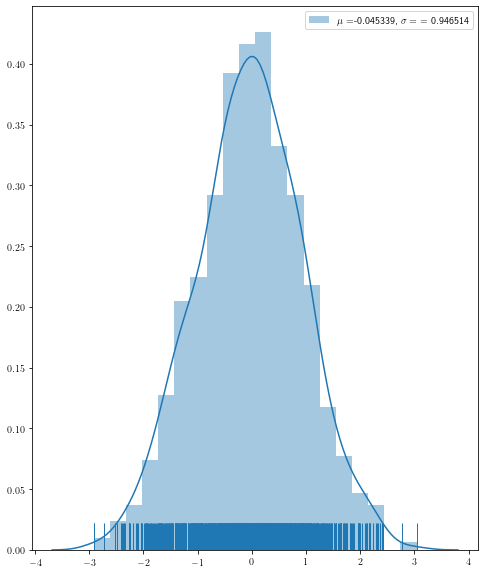

In [4]:
X = np.random.normal(size=1000) # 1000 random standard samples centered 0 mean and unit variance 

print (X.mean(), X.var())
sns.distplot(X,bins=20, kde=True, rug=True, label="$\mu = ${:f}, $\sigma = $ = {:f}".format(X.mean(), X.var()))
plt.legend()

We scale this as

$Z = \sigma X + \mu \text{ is Guassian}  Z \sim \mathcal{N}(\mu, \sigma^2)$

In [6]:
#Lets scale the gaussian rv X
def scale_gaussian(mu, sigma):
    Z = sigma*X + mu
    sns.distplot(X, kde=True, rug=True, label="Original X with $\mu_1$ = {:f} and $\sigma_1$ = {:f}".format(X.mean(), X.var()))
    sns.distplot(Z, kde=True, rug=True, label="$Z = \sigma_2 X + \mu_2$, where $\mu_2$ = {}, $\sigma_2$ ={}".format(mu, sigma))
    plt.legend()

In [7]:
interact(scale_gaussian, mu = widgets.Dropdown(options=np.arange(-10,11), value = 2)
         , sigma = widgets.Dropdown(options=np.arange(1,5), value = 2))

interactive(children=(Dropdown(description='mu', index=12, options=(-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0…

<function __main__.scale_gaussian(mu, sigma)>

# Part 2: Multivariate Gaussian Distribution

In the univariate cause, we saw that $\mathbf{X} \in \mathcal{R}$. In multidimensional setting however:

$$
\mathbf{X} \in \mathcal{R}^d \\
\mathbf{X} = (x_1,x_2, ..., x_d)^T \text{... a vector}
$$. 



- Impling that multi-dimensional generalization of the [univariate normal](https://en.wikipedia.org/wiki/Normal_distribution) is the [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) distribution.
- Like the normal distribution, the multivariate normal is defined by sets of parameters: 

    * The mean vector $\mathbf{\mu}$, which is the expected value of the distribution. 
    * The [covariance](https://en.wikipedia.org/wiki/Covariance) matrix $\Sigma$. 

The $\Sigma$ measures how dependent two random variables are and how they change together. We denote the covariance between variable $X$ and $Y$ as $Cov(X,Y)$. 

A $d$ multivariate normal has a [joint probability density](https://en.wikipedia.org/wiki/Joint_probability_distribution) given by:

$$
\begin{align}
p_\mathbf{X}(\mathbf{X}) & =  p_\mathbf{X}(x_1, x_2,...,x_d) \\ 
  & =  \frac{1}{\sqrt{(2\pi)^d} \lvert\Sigma\rvert} \exp{ \left( -\frac{1}{2}(\mathbf{X} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{X} - \mathbf{\mu}) \right)}
\end{align}
$$
Where:

* $\mathbf{X}$ a random vector of size $d$, $\mathbf{\mu}$ is the mean vector
* $\Sigma$ is the ([symmetric](https://en.wikipedia.org/wiki/Symmetric_matrix), [positive definite](https://en.wikipedia.org/wiki/Positive-definite_matrix)) covariance matrix (of size $d \times d$)
* $\lvert\Sigma\rvert$ its [determinant](https://en.wikipedia.org/wiki/Determinant). 

In general we denote this multivariate normal distribution as $\mathcal{N}(\mathbf{\mu}, \Sigma) \text{ where:}$ 

$$
\begin{align}
\Sigma & = Cov(\mathbf{X}, \mathbf{X}) \\
& \sim \mathbf{E}[(\mathbf{X}- \mu)(\mathbf{X}- \mu)^T] \\
& \sim \mathbf{E}[\mathbf{X}\mathbf{X}^T] - \mu \mu^T
\end{align}
$$

## Bivariate cause of a Multivariate Gaussian . $\text{i.e } d = 2$

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib qt

In [9]:
# x is the random variable rv with d, mean is the mean vector of rv, cov is the variance
def multivariate_normal(x, d, mean, cov):
    det_cov = np.linalg.det(cov)
    constant_term = 1/(np.sqrt((2*np.pi**d))*det_cov)
    x_m = x - mean
    frac = -0.5 * x_m.T.dot(np.linalg.solve(cov, x_m))
    pdf_value = constant_term * np.exp(frac)
    return pdf_value

In [10]:
def plot_3d_gaussian(mu = np.array([0., 0.]) , Sigma = np.array([[ 1. , 0], [0,  1]])):  
    # lets make a 2D mesh - plane
    X_1, X_2 = np.meshgrid(np.linspace(-5,5,80), np.linspace(-5,5,80))
    Z = np.empty(X_1.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = multivariate_normal(np.array([X_1[i,j], X_2[i,j]]), 2, mu, Sigma)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_1, X_2, Z, cmap=cm.coolwarm)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')
    ax.set_zlabel('Z')

In [13]:
plot_3d_gaussian()                                  

## Properties of Multivariate Gaussians

Recall that for multivariate gaussian our random variable $\mathbf{X}$ is a $d$ dimensional vector given as $\mathbf{X} = (x_1,x_2, \cdots, x_d)^T$

Suppose we partition $\mathbf{X}$ two sets $\mathbf{X}_A,\mathbf{X}_B$ as 
$$
\underbrace{f_\mathbf{X}(x_1, x_2, \cdots, x_s}_{\mathbf{X}_A}, \underbrace{x_{s+1}, x_{s+2}, \cdots, x_N)}_{\mathbf{X}_B} \sim \mathcal{N}(\boldsymbol \mu, \mathbf{K}).
$$

### Joint Density
Then the joint is gaussian and can be written as $f_\mathbf{X}(\mathbf{X}_A, \mathbf{X}_B) \sim \mathcal{N}(\mu, \Sigma)$  where 

$$
\boldsymbol \mu = 
    \begin{bmatrix}
        \boldsymbol \mu_A \\
      \boldsymbol \mu_B
    \end{bmatrix}
  \; \; \text{and} \; \;
    \Sigma = 
    \begin{bmatrix}
         \Sigma_{AA} & \Sigma_{AB} \\
         \Sigma_{BA} & \Sigma_{BB}
    \end{bmatrix}
$$

**Note**: $\Sigma_{\mathbf{.}\mathbf{.}}  = Cov(\mathbf{.},\mathbf{.}) \text{.........   for example } Cov(\mathbf{X}_A, \mathbf{X}_B) = \Sigma_{AB}$

### Marginal Density <a id="marginal"></a>

The *marginal* density $f_\mathbf{X}(\mathbf{X}_A)$ is also gaussian can also be written as:

$$
f_\mathbf{X}(\mathbf{X}_A)  = \int_{\mathbf{X}_B} f_\mathbf{X}(\mathbf{X}_A, \mathbf{X}_B) \text{d} \mathbf{X}_B =
       \mathcal{N}(\boldsymbol \mu_A, \Sigma_{AA} )%\\
$$

### Conditional Density
The conditional density $f_\mathbf{X}(\mathbf{X}_A|\mathbf{X}_B )$ is a gaussian and can be written as:

$$
f_\mathbf{X}(\mathbf{X}_A|\mathbf{X}_B)  \sim \mathcal{N}(\bar{\mu}, \bar{\Sigma})
$$
where:
$\bar{\mu} = \mu_A + \Sigma_{AB}\Sigma_{BB}^{-1}(\mathbf{X}_B -\mu_B)$ 

$\bar{\Sigma} = \Sigma_{AA} - \Sigma_{AB}\Sigma_{BB}^{-1}\Sigma_{BA}$ 

## Visualization of Gaussian Properties - for Bivariate gaussian

In [14]:

def demo_3d_gaussian(sig11, sig12, sig21, sig22, x2 = -4, mu1 = 0, mu2 = 0):  
    ## calculate marginals
    ## expand the dimensions of all inputs by one so the code can generalize to d dimensions    
    
    fig = plt.figure(figsize=(20,20))
    mu = np.array([mu1, mu2])
    Sigma = np.array([[sig11, sig21], [sig12, sig22]])

    m_temp = np.linalg.solve(np.array([Sigma[1,1],])[:, None], np.array([x2,])[:, None] - np.array([mu[1],])[:, None])     
    
    estimate_mean = np.array([mu[0],])[:, None] + np.array([Sigma[1,1],])[:, None]*m_temp
    
#     calculate the covariance/variance
    s_temp = np.array([Sigma[0,1], ])[:, None]* np.linalg.inv(np.array([Sigma[1,1],])[:, None]) * np.array([Sigma[1,0], ])[: None]
    estimate_sigma = np.array([Sigma[0,0], ])[:, None] - s_temp
    


    # lets make a 2D mesh - plane for plotting 3d
    X_1, X_2 = np.meshgrid(np.linspace(-5,5,80), np.linspace(-5,5,80))
    
    #calculate the densities
    Z = np.empty(X_1.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = multivariate_normal(np.array([X_1[i,j], X_2[i,j]]), 2, mu, Sigma)

            
    # lets plot everything
    ax = fig.add_subplot(121, projection='3d')    
    
    #slices    
    cmap = plt.cm.viridis     
    surf = ax.plot_surface(X_1, X_2, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
    cset = ax.contourf(X_1, X_2, Z, zdir='y'
                       ,offset=x2, cmap=cm.CMRmap_r)  ## a slice of the bivariate guassian at x2
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')
    ax.set_zlabel('Z')
    fig.colorbar(surf, shrink=0.5, aspect=10)   
    ax2 = fig.add_subplot(122)
    ax2.plot(X_2[:,x2],Z[:,x2], label='f($X_1|X_2$ = {:d}; $\mu = ${}; $\sigma = ${})'.format(x2, mu, Sigma))
    ax2.legend()
    plt.show()

In [15]:
interact(demo_3d_gaussian, mu1 = widgets.Dropdown(options=np.arange(-10,11), value = 0),
         mu2 = widgets.Dropdown(options=np.arange(-10,11), value = 0),
         sig11 = widgets.Dropdown(options=np.arange(0,2,.1), value = 1),
        sig12 = widgets.Dropdown(options=np.arange(0,2,.1), value = 0),
        sig21 = widgets.Dropdown(options=np.arange(0,2,.1), value = 0),
         sig22 = widgets.Dropdown(options=np.arange(0,2,.1), value = 1),
         x2 = widgets.Dropdown(options=np.arange(-10,11), value = -4))

interactive(children=(Dropdown(description='sig11', index=10, options=(0.0, 0.1, 0.2, 0.30000000000000004, 0.4…

<function __main__.demo_3d_gaussian(sig11, sig12, sig21, sig22, x2=-4, mu1=0, mu2=0)>


## Drawing random samples from multivariate gaussian

- For multivariate gaussian our random variable $\mathbf{X}$ is a $d$ dimensional vector given as: 
$$\mathbf{X} = (x_1,x_2, ..., x_d)^T
$$
- Just like the univariate gaussian, multivariate Gaussian -scaling property holds

    - if $\mathbf{X} \sim \mathcal{N}(0, I) \iff$ there exists $\mu \in \mathcal{R}^d$, $\mathbf{A}^{d x \ell}$ such that $\mathbf{Z} = \mathbf{A}\mathbf{X} + \mu$ for $Z \sim \mathcal{N}(\mu, \Sigma)$ 


- Therefore, since $\mathbf{X} \sim \mathcal{N}(0, \mathcal{I})$, 
    then we can **draw random $d$-dimensional standard normal vectors, scale and plot them - along the variables of the vector**. 

## Note
- for $d \sim \infty$ we get an **infinite dimensional vector** which we can treat as a function


### Lets show this


In [16]:
%matplotlib inline

plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = [12, 12]
# define a zero mean for our gaussian for d dimensions
def sampleRVX(d = 100, noF = 2):    
    mean = np.zeros(d)  # zero mean
    cov = np.identity(d)  # identity symmetric positive definite covariance

    # sample no_f multivate random vectors each of dimension d
    # Recall that as d goes to infinity we get an infinite dimensional vector or function
    X = np.random.multivariate_normal(mean, cov, noF).T  #transport so we have no_v x d matrix
    
    #plot
    fig = plt.figure()
    
    ax1 = fig.add_subplot(211)
    ax1.plot(X)
    ax1.set_title("Vector space/function space")
    
    ax2 = fig.add_subplot(212)
    ax2 = sns.heatmap(cov, ax = ax2)
    ax2.set_title("Covariance Matrix")

In [17]:
interact(sampleRVX, d = widgets.Dropdown(options=np.arange(1,1000), value = 100),
         noF = widgets.Dropdown(options=np.arange(1,50), value = 2))

interactive(children=(Dropdown(description='d', index=99, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …

<function __main__.sampleRVX(d=100, noF=2)>

### Observations

the shape of these functions are defined by how the variables in $\mathbf{X}$ are **correlated**

In [18]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = [12, 12]
# define a zero mean for our gaussian for $d$= 50
def sampleRVxWithRandomCOV(noF, d = 100):    
    mean = np.zeros(d)  # zero mean
    a = np.sort(np.random.rand(1,d), axis=1) # identity symmetric positive definite covariance 
    cov = a*a.T # colinear covariance
    
    print ((cov == cov.T).all())  #check for symmetry
    
    # sample no_v multivate random vectors each of dimension d
    # Recall that as d goes to infinity we get an infinite dimensional vector or function
    X = np.random.multivariate_normal(mean, cov, noF).T #transport so we have no_v x d matrix
    
    #plot
    fig = plt.figure()
    
    ax1 = fig.add_subplot(211)
    ax1.plot(X)
    ax1.set_title("Vector space/function space")
    
    ax2 = fig.add_subplot(212)    
    ax2 = sns.heatmap(cov, ax = ax2)
    ax2.set_title("Covariance Matrix")


In [19]:
interact(sampleRVxWithRandomCOV, noF = widgets.Dropdown(options=np.arange(1,50), value = 2),
         d = widgets.Dropdown(options=np.arange(2,1000), value = 100))

interactive(children=(Dropdown(description='noF', index=1, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…

<function __main__.sampleRVxWithRandomCOV(noF, d=100)>

# Part 3: Gaussian Processes (Regression)
With this lets introduction ***Gaussian Processes***

- A Gaussian process derives its idea from a Multivariate Gaussian distribution

- A Gaussian process (GP) is a collection of random variables, any finite number of which have a joint Gaussian distribution.

- Equivalently, a GP can be seen as a stochastic process which corresponds to an infinite dimensional Gaussian distribution.

These random variables represent values of the function $f(x)$

### Mathematically

We define a random variable $\mathcal{F}$: 

$$
\mathbf{f}  \triangleq \{ f(x_i) \}_i^n  \text{, which implies that, } \mathbf{f} \in \mathcal{F}^n vector 
$$


consequently for in a Gaussian Process:
$$
\begin{align}
\mathcal{F} & \sim \mathcal{N}(\mu_{\mathbf{f}}, \mathbf{K}) \\
 & \sim \mathcal{GP}(\mu_{\mathbf{f}}, \mathbf{K})
\end{align}
$$

for mathematical convenience $\mu_{\mathbf{f}} = \mathbf{0}$, we could also set $\mu_{\mathbf{f}} = \textbf{c}$, where $\textbf{c}$ constant. $\mu_{\mathbf{f}} = \textbf{.}$ could also be another learnable function.

For convenience $\mu_{\mathbf{f}} = \mathbf{0}$, probability density functions becomes:

$$
\begin{align}
p_\mathbf{f}(\mathcal{F}) & =  p_\mathbf{f}(f_1, f_2, \cdots,f_n) \\ 
  & \sim  \frac{1}{\sqrt{(2\pi)^n} \lvert\Sigma\rvert} \exp{ \left( -\frac{1}{2}\mathbf{f}^T \mathbf{K}^{-1}\mathbf{f}) \right)} \; \; \; \; (1)
\end{align}
$$

where:
- we assume $\mu_{\mathbf{f}} = 0 $, $K = \mathbf{K}(\mathbf{X}, \mathbf{X}^{\prime} ))$
- $\mathbf{X}$ is the collection of training inputs $(x_1, x_2, \cdots, x_n)$.
- $d \in \mathcal{Z} $ is the dimension of the observed **data**, so $x_i \in \mathcal{X}^d \text{, for  } i = \{1, 2, \cdots, n \} $ 
- We call $\mathbf{K}$ a **Kernel** matrix and from multivariate normal we know this is a **positive definite**. 

In general, this means that $\mathbf{f}$ is a multivariate normal with mean $\mu_{\mathbf{f}}$ and covariance  $\mathbf{K}(\mathbf{X}, \mathbf{X}^{\prime} ))$.



### Main Point 
- If we treat each $f(x_i) \text{ where } x \in \mathcal{R}^d$ as a single variable within a **multivariate normal vector**  then we get a **Gaussian Process**
- Therefore, since $\mathbf{f} \in \mathcal{R}^n $, then $n \sim \infty$ implies we get an infinite dimensional vector *(which we treat as a function)* just as in the demonstrated case of multivariate normal. This gives a clear intuition as to why a GP can be seen as an *infinite dimensional multivariate Gaussian* which is used as a *prior over functions*, since one sample from a GP is a function.




### Mean and covariance function

The $n$-dimensional Gaussian is parameterized by its mean vector and its covariance matrix, a GP is parameterized by a mean *function* and a covariance *function*. To explain this, we'll assume (without loss of generality) that the mean function is $\mu(x) = \mathbf{0}$. As for the covariance function, $k(x,x')$, it is a function that receives as input two locations $x,x'$ belonging to the input domain, i.e. $x,x' \in \mathcal{X}^d$, and returns the value of their co-variance.

In this way, if we have a *finite* set $n$ of input locations (which we denote as $\mathbf{X}$ ), we can evaluate the covariance function at every pair of locations and obtain a covariance matrix $\mathbf{K}$. We write:
$$
\mathbf{K} = k(\mathbf{X}, \mathbf{X}),
$$


More on covariance functions later. For the moment, think of them as kind of a black box.

Importantly, even if we assume that the input domain is inifinte, e.g. $n \sim \infty $, we can get away with never having to perform infinite number of operations. This is because of the marginalization property of the Gaussian distribution as discussed [Maginal Density](#marginal)

## Noiseless model

- Consider a supervised learning scenaria $\mathbf{y} \triangleq \{f(x_i) \}_i^n$ -- meaning the function values are **not** corrupted by noise
- Problem being to estimate $\mathbf{y}^*$
- In this case, infering  problem is to infer $\mathbf{f}^*$ is similar to inferring $\mathbf{y}^*$



####  Recall Marginalization and conditioning properties of the GP

### Joint

- Recall the definition $\mathbf{f} \triangleq \{f_i, f_2, \cdots, f_n \}$ -- Set of functions evaluated at $x_i$
- Also, $\mathbf{X} = (x_1, x_2, \cdots, x_n)$ - a collection of the entire dataset
- Assume we partition $\mathbf{f}$ into $\mathbf{f}_A$, $\mathbf{f}_B$. Then, the joint distribution can be written as:
$$
p_\mathbf{f}(\underbrace{f_1, f_2, \cdots, f_s}_{\mathbf{f}_A}, \underbrace{f_{s+1}, f_{s+2}, \cdots, f_N}_{\mathbf{f}_B}) \sim \mathcal{G}\mathcal{P}(\boldsymbol \mu, \mathbf{K}).
$$
with:
$$
\boldsymbol \mu = 
    \begin{bmatrix}
        \boldsymbol \mu_A \\
      \boldsymbol \mu_B
    \end{bmatrix}
  \; \; \text{and} \; \;
    \mathbf{K} = 
    \begin{bmatrix}
         \mathbf{K}_{A A} & \mathbf{K}_{A B} \\
         \mathbf{K}_{B A} & \mathbf{K}_{B B}
    \end{bmatrix}
$$

### Marginal

And the *marginal* distribution can be written as:

$$
p_\mathbf{f}(\mathbf{f}_A, \mathbf{f}_B)  \sim \mathcal{N}(\boldsymbol \mu, \mathbf{K}). \text{ Then:} \\
p_\mathbf{f}(\mathbf{f}_A)  = \int_{\mathbf{f}_B} p_\mathbf{f}(\mathbf{f}_A, \mathbf{f}_B) \text{d} \mathbf{f}_B =
       \mathcal{N}(\boldsymbol \mu_A, \mathbf{K}_{A A}) %\\
% p(\mathbf{f}_B)  = \int_{\mathbf{f}_A} p(\mathbf{f}_A, \mathbf{f}_B) \text{d} \mathbf{f}_A = 
%        \mathcal{N}(\boldsymbol \mu_B,\mathbf{K}_{B B})
$$

The marginalization property means that the training data that have any (potentially infinite in number) test data $f_*$ that we have not seen (yet), follow a (potentially infinite) Gaussian distribution with mean and covariance:

$$
  \boldsymbol \mu_{\infty} = 
    \begin{bmatrix}
      \boldsymbol \mu_{\!_\mathbf{X}} \\
      \cdots \\
      \cdots
    \end{bmatrix}
  \; \; \text{and} \; \;
    \mathbf{K}_{\infty} = 
    \begin{bmatrix}
      \mathbf{K}_{\!_\mathbf{X} \!_\mathbf{X}} & \cdots \\
      \cdots & \cdots
    \end{bmatrix}
$$

where $\mathbf{X}$ is training inputs and $\mathbf{K}_{XX}$ is the covariance matrix constructing by evaluating the covariance *function* at all given inputs. 

So, in the Gaussian process case (assuming 0 mean) we have a joint Gaussian distribution of the training and the (potentially infinite!) test data:

$$
\begin{bmatrix}\mathbf{f} \\ \mathbf{f}^*\end{bmatrix} \sim \mathcal{N}\left(\mathbf{0}, \begin{bmatrix} \mathbf{K} & \mathbf{K}_\ast \\ \mathbf{K}_\ast^\top & \mathbf{K}_{\ast,\ast}\end{bmatrix}\right)
$$

Here, $\mathbf{K}_\ast$ is the (cross)-covariance matrix obtained by evaluating the covariance function in pairs of training inputs $\mathbf{X}$ and test inputs $\mathbf{X_*}$, ie.

$$
\mathbf{K}_\ast = k(\mathbf{X}, \mathbf{X}_*) .
$$

Similarly:

$$
\mathbf{K}_{\ast\ast} = k(\mathbf{X}_*, \mathbf{X}_*) .
$$

### Conditional 

Interestingly, conditioning a multivariate Gaussian to obtain the posterior distribution also yields a Gaussian:
Again, if
$$
p_\mathbf{f}(\mathbf{f}_A, \mathbf{f}_B)  \sim \mathcal{N}(\boldsymbol \mu, \mathbf{K}). \; \; \text{Then:} \\
p_\mathbf{f}(\mathbf{f}_A | \mathbf{f}_B) = \mathcal{N}(\boldsymbol \mu_A + \mathbf{K}_{AB} \mathbf{K}^{-1}_{BB} (\mathbf{f}_B - \boldsymbol \mu_B), \mathbf{K}_{AA} - \mathbf{K}_{AB}\mathbf{K}_{BB}^{-1}\mathbf{K}_{BA})
$$

In the GP context this can be used for inter/extrapolation. Assume that we have a function $f$ with input domain $\mathcal{X} = \mathbb{R}$ and we set a GP prior on $f$ (so, now we use $f$ to denote function evaluations, rather than random variables). Also assume that we have a training set $\mathbf{X} = [x_1, x_2, \dots x_N]$. Then, we can condition on the function ouputs evaluated on the training set in order to perform inference for the function value at *any* input location $x_* \in \mathbb{R}$. This conditioning means finding the GP posterior *process*:

$$
p_\mathbf{f}(\mathbf{f_*} | \mathbf{f_1}, \cdots, \mathbf{f_N}) = 
p_\mathbf{f}(f(x_*) | f(x_1), \cdots, f(x_N)) \\
         \sim \mathcal{N}(\mathbf{K}_*^\top \mathbf{K}^{-1} \mathbf{f}\; , \; \mathbf{K}_{*,*} - \mathbf{K}_*^\top \mathbf{K}^{-1} \mathbf{K}_*)
$$

Remember, the test inputs $\mathbf{X}_*$ appear in the above expression inside $\mathbf{K}_*$ and $\mathbf{K}_{**}$.

## Noise model

It is typical for more realistic modelling situations that we do not have access to function values themselves

We assume a noise model as:

$$
y = f(x) + \epsilon
$$

Assuming additive independent identically distributed (**i.i.d**) Gaussian noise ($\epsilon \sim \mathcal{N}(0,\sigma^2)$) with variance $\sigma^2$ , the prior on the noisy observations becomes:
$$
\begin{align}
 cov(y_p, y_q) &= k(x_p, x_q) + \sigma^2 \delta_{pq} \\
 cov(\mathbf{y}) &= \mathbf{K} + \sigma^2 \mathbf{I}
\end{align}
$$

where $\delta$ is a Kronecker delta and $\delta = 1$ iff $p=q$ or $0$ otherwise.

## Punchline for noisy case
The assumption about Gaussian noise says that the *training data* $(x,y) \in (\mathbf{X}, \mathbf{Y})$ are related by a function $f$ whose output is then corrupted by Gaussian noise (i.e. we have noisy observations).
The above construction, gives us the following probabilities densities:

$$
\begin{equation}
p_\mathbf{f}(\mathbf{y}|\mathbf{f}) = \mathcal{N}(\mathbf{y}|\mathbf{f}, \sigma^2 \mathbf{I}) 
\end{equation}
$$

$$
p_\mathbf{f}(\mathbf{f}|\mathbf{x}) = \mathcal{N}(\mathbf{f}|\mathbf{0}, K_{ff}) = (2 \pi)^{n/2} |K_{ff}|^{-1/2} \exp\left( -\frac{1}{2} \mathbf{f}^T K_{ff} \mathbf{f} \right) \text{where:} K_{ff} = k(\mathbf{x},\mathbf{x}) \; \; \; \; (2) \text{ in as (1) }
$$

$$
p_\mathbf{f}(\mathbf{y}|\mathbf{x}) = \int p(\mathbf{y}|\mathbf{f})p(\mathbf{f}|\mathbf{x}) d\mathbf{f} = \mathcal{N}(\mathbf{y}|\mathbf{0},K_{ff}+\sigma^{2} \mathbf{I}) \; \; \; \; (3)
$$


where the last quantity is called the **marginal likelihood** and is tractable because of our choice for noise $\epsilon$ which is normally distributed.



## Predictions
Now, for a test point $x_*$ we want to compute its output on the observed space, i.e. we want to compute $y_*$. Building on the noise model and the previously shown expressions, the posterior for the test outputs is given by:

$$
\mathbf{y}^* | \mathbf{y}, \mathbf{x}, \mathbf{x_*} \sim \mathcal{N}(\boldsymbol \mu_{\text{pred}},\mathbf{K}_{\text{pred}}) \; \; \; \; (4)
$$
with  
$$
\boldsymbol \mu_{\text{pred}} = \mathbf{K}_*^\top \left[\mathbf{K} + \sigma^2 \mathbf{I}\right]^{-1} \mathbf{y}
$$
and 
$$
\mathbf{K}_{\text{pred}} = \mathbf{K}_{*,*} - \mathbf{K}_*^\top \left[\mathbf{K} + \sigma^2 \mathbf{I}\right]^{-1} \mathbf{K}_*.
$$

# Covariance functions, aka kernels

We saw above their role for creating covariance matrices from training inputs, thereby allowing us to work with finite when the domain is potentially infinite.

We'll see below that the covariance function is what encodes our assumption about the GP. By selecting a covariance function, we are making implicit assumptions about the shape of the function we wish to encode with the GP, for example how smooth it is.

Even if the covariance function has a parametric form, combined with the GP it gives us a nonparametric model. In other words, the covariance function is specifying the general properties of the GP function we wish to encode, and not a specific parametric form for it.

Below we define two very common covariance functions: The RBF (also known as Exponentiated Quadratic or Gaussian kernel) which is differentiable infinitely many times (hence, very smooth), and the linear one:
$$
k_{RBF}(\mathbf{x}_{i,:},\mathbf{x}_{j,:}) = \sigma^2 \exp \left( -\frac{1}{2\ell^2} \sum_{d=1}^D (x_{i,q} - x_{j,q})^2\right)
$$
where $D$ denotes the dimensionality of the input space. Its parameters are: the *lengthscale*, $\ell$ and the variance $\sigma^2$.

$$
k_{lin}(\mathbf{x}_{i,:},\mathbf{x}_{j,:}) = \sigma^2 \mathbf{x}_{i,:}^T \mathbf{x}_{j,:}
$$
Its parameters is the variance $\sigma^2$.

Below, we will implement and investigate them.

Given hyperparameters l, we plot the resulting cov. matrix and samples from a GP with this cov. function.

## Defining covariance function forms

In [21]:
from sklearn.gaussian_process.kernels import RBF

def cov_linear(x,x2=None,theta=1):
        if x2 is None:
            return x*x.T*theta
        else:
            return x*x2.T*theta   
        
def cov_RBF(x, x2=None, theta=np.array([1,1])):     
        variance = theta[0]
        lengthscale = theta[1]
        kernel = variance* RBF(lengthscale)     
        
        if x2 is None:
            return kernel(x)
        else:
            return kernel(x,x2)

## Experimenting with covariance function parameters

Text(0.5, 0.98, 'RBF (left) and Linear (right) cov. matrices created with different parameters')

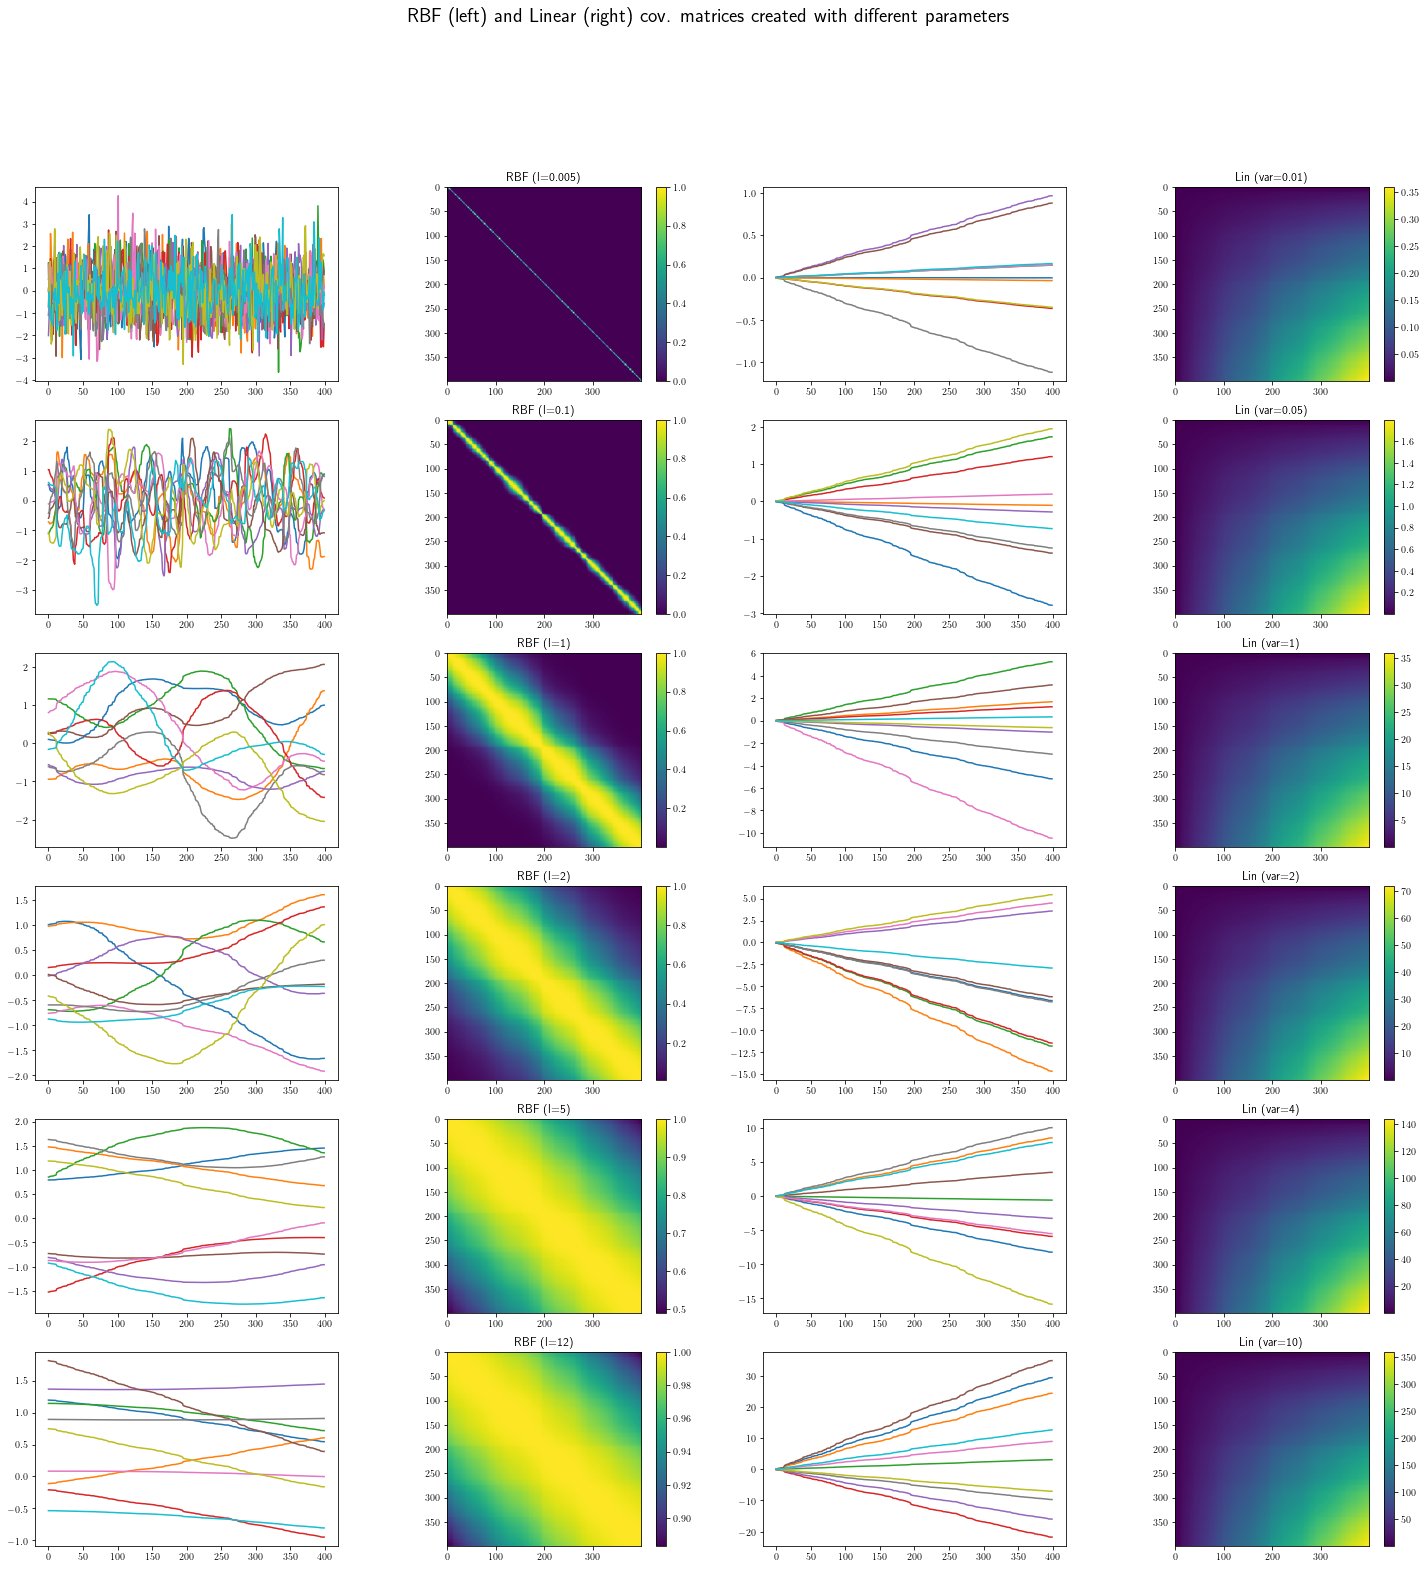

In [22]:
X = np.sort(np.random.rand(400, 1) * 6 , axis=0)

params_linear = [0.01, 0.05, 1, 2, 4, 10]
params_rbf    = [0.005, 0.1, 1, 2, 5, 12]
K = len(params_linear)

plt.figure(figsize=(25,25))
j=1
for i in range(K):
    # plot function family for rbf kernel
    plt.subplot(K,4,j)
    K_rbf = cov_RBF(X,X,theta=np.array([1,params_rbf[i]]))
    f_rbf = np.random.multivariate_normal(np.zeros(shape = X.shape[0]), K_rbf, 10).T  # sample GP based on cov and zero mean
    plt.plot(f_rbf)
    
    ## visualize RBF kernel
    plt.subplot(K,4,j+1)
    plt.imshow(K_rbf)
    plt.colorbar()
    plt.gca().set_title('RBF (l=' + str(params_rbf[i]) + ')')
    
    # plot function family for colinear kernel    
    plt.subplot(K,4,j+2)
    K_lin = cov_linear(X,X,theta=params_linear[i])
    f_lin = np.random.multivariate_normal(np.zeros(shape = X.shape[0]), K_lin, 10).T  # sample GP based on cov and zero mean
    plt.plot(f_lin)
    
    # visualize colinear kernel
    plt.subplot(K,4,j+3)
    plt.imshow(K_lin)
    plt.colorbar()
    plt.gca().set_title('Lin (var=' + str(params_linear[i]) + ')')
    
    j+=4
    
plt.suptitle('RBF (left) and Linear (right) cov. matrices created with different parameters', fontsize=20)

## Sampling GP instances from covariance functions


As we see, short lengthscales give very small correlations in the cov. matrix, resulting in very non-smooth functions. Conversely, long lengthscales result in very strongly correlated matrices and, therefore, very smooth functions. 

### Other covariance functions using GPy library

As we saw, each covariance function can be parameterezed and (as we'll see next) adapted to the data. It's important, however, to use a reasonable cov. function to begin with, if we have some knowledge about our data. Importantly, by doing so we make our assumptions about our modelling approach explicit, which is a good principle in Bayesian statistics.

There are other covariance functions apart from the linear and the RBF. There is a very good GPy tutorial on this.

We can get a quick taste:

Text(0.5, 0.98, 'Cov. function form (left) and Sample cov. matrix (right)')

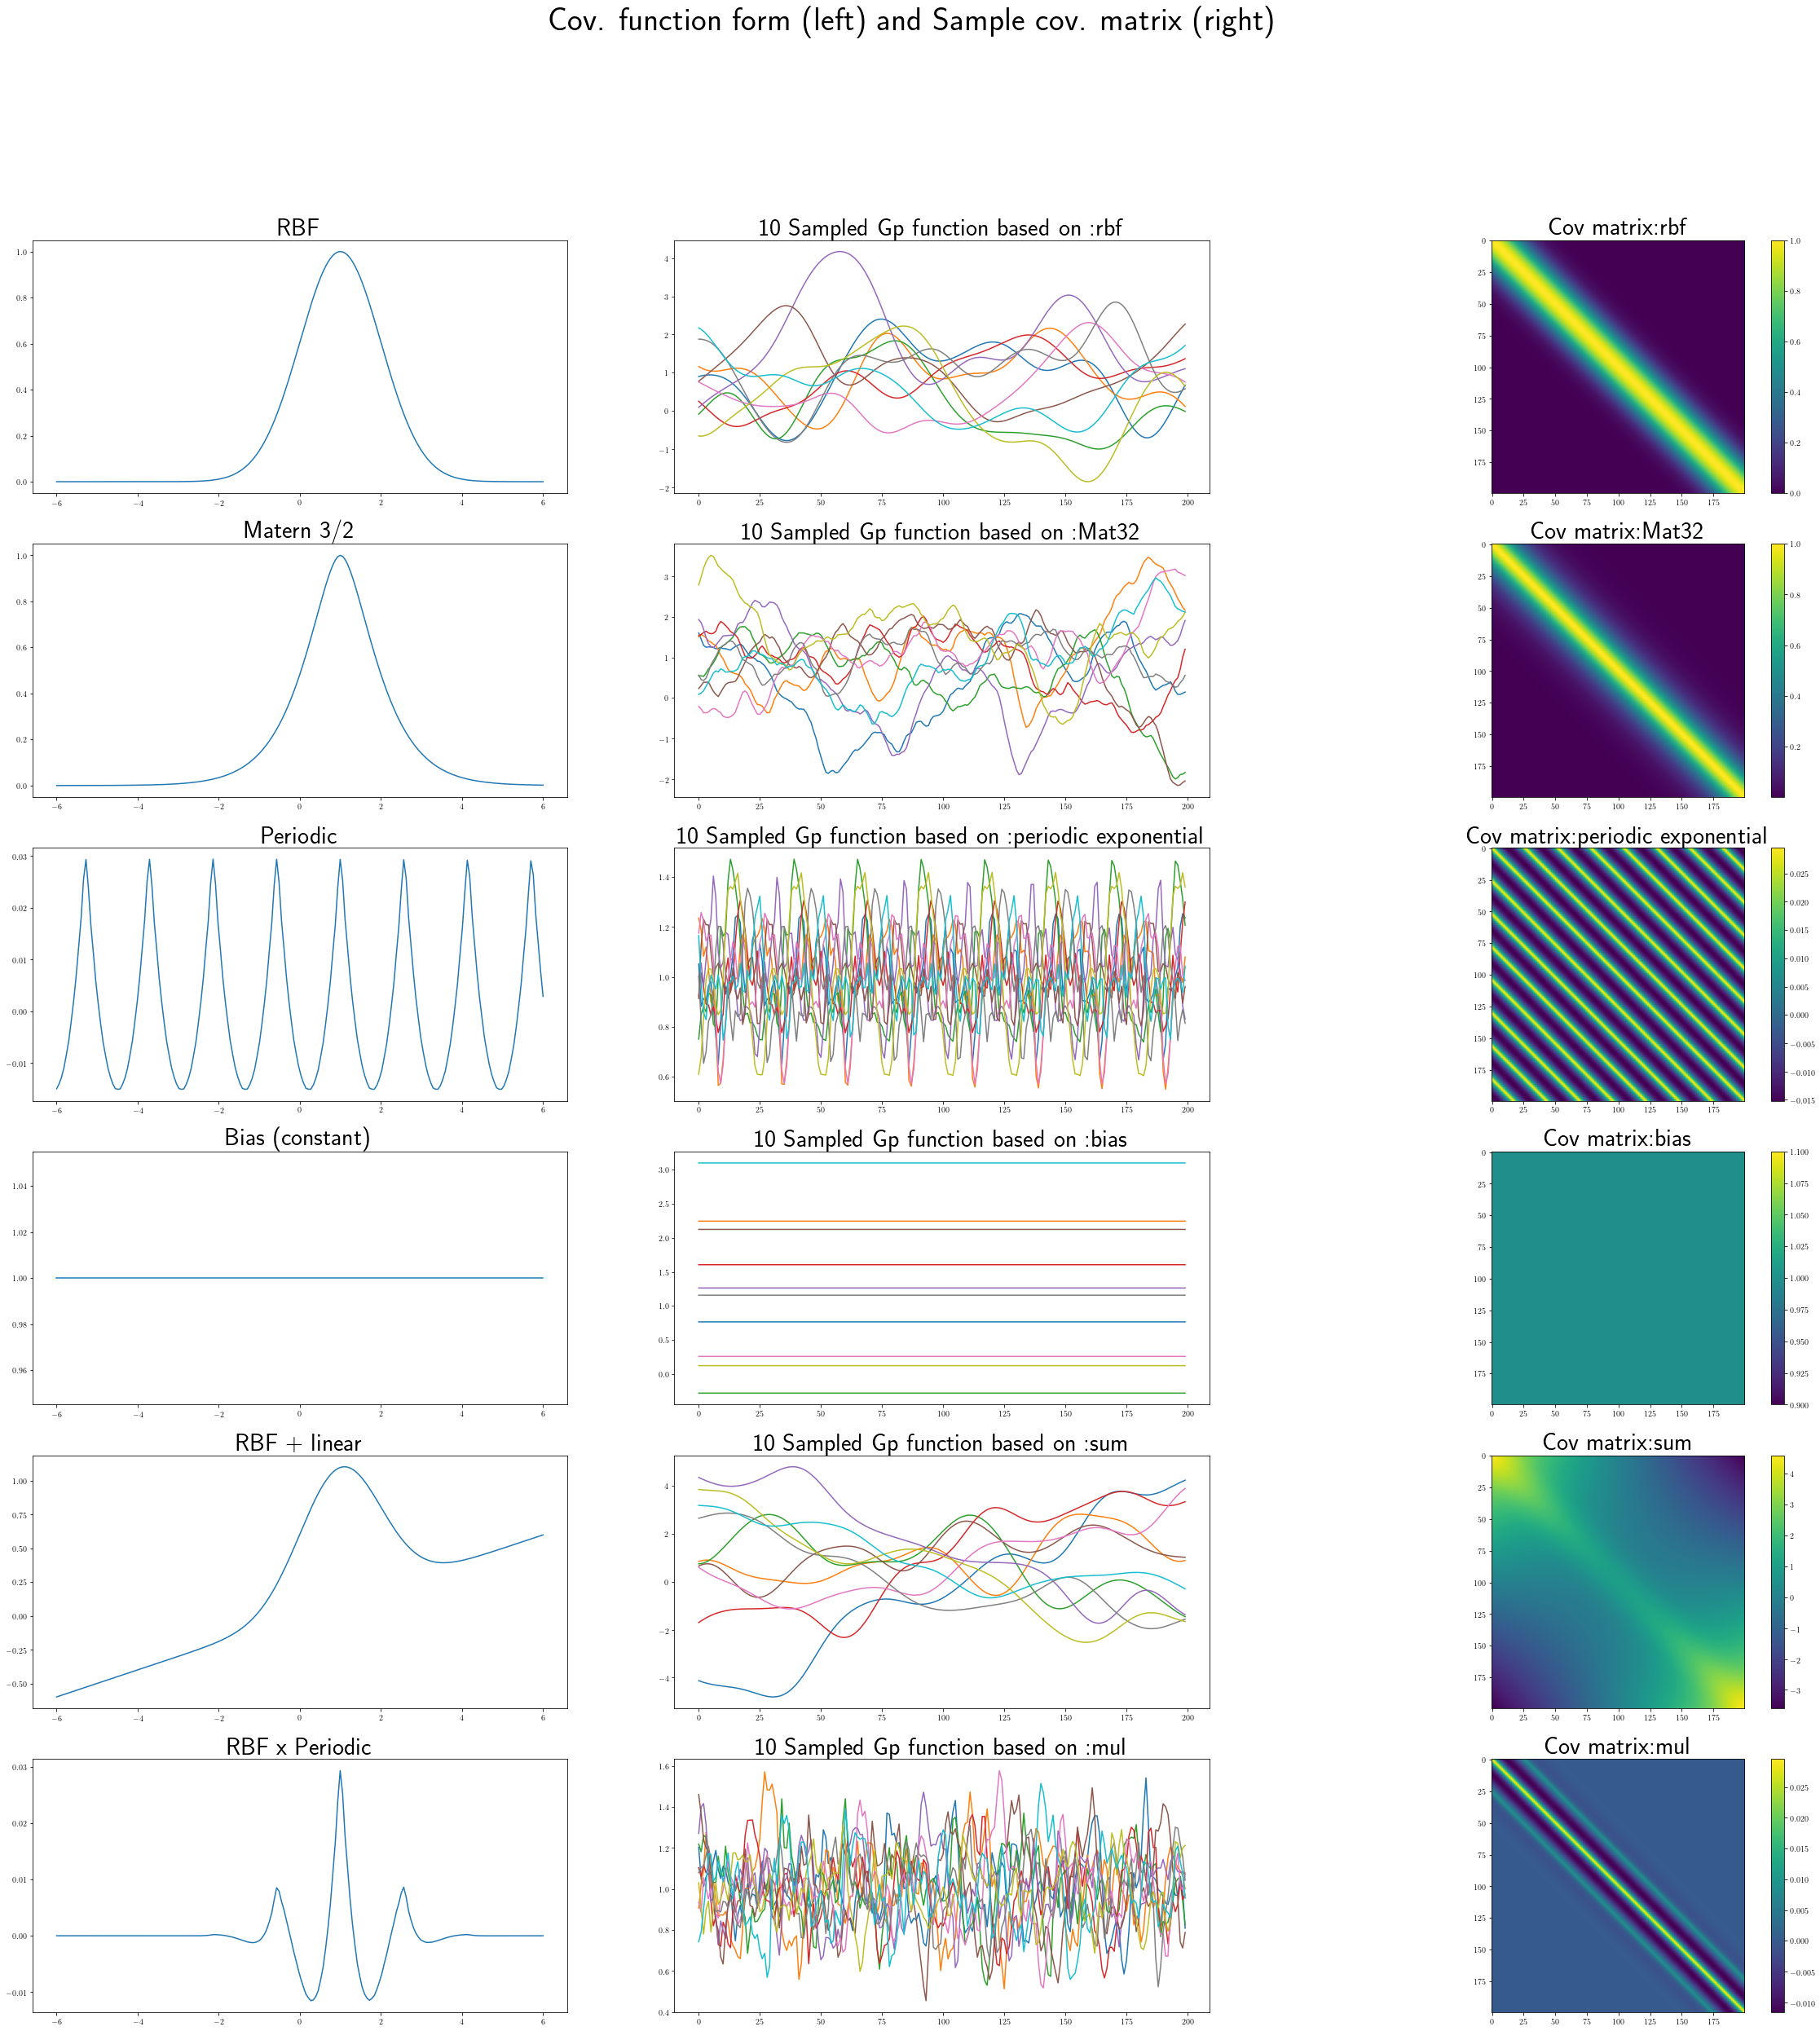

In [23]:
import GPy

Q=1  # lengthscale, variance = 1
x_tmp = np.linspace(-6,6,200)[:, None]
mean = np.array([[1.0]]) # with kernels centered at mean 1

plt.figure(figsize=(40,40))



# first row
i=1
kern = GPy.kern.RBF(Q)
plt.subplot(6,3,i)
kern = GPy.kern.RBF(Q)
plt.plot(x_tmp, kern.K(x_tmp, mean)); plt.gca().set_title('RBF', fontsize=30)


plt.subplot(6,3,i+1)
f = np.random.multivariate_normal(np.ones(shape =x_tmp.shape[0]), kern.K(x_tmp), 10).T
plt.gca().set_title('10 Sampled Gp function based on :' + kern.name, fontsize=30)
plt.plot(f) 

plt.subplot(6,3,i+2) 
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)
plt.colorbar()


#next row
i+=3
plt.subplot(6,3,i)
kern = GPy.kern.Matern32(Q)
plt.plot(x_tmp, kern.K(x_tmp, mean)); plt.gca().set_title('Matern 3/2', fontsize=30);

plt.subplot(6,3,i+1)
f = np.random.multivariate_normal(np.ones(shape =x_tmp.shape[0]), kern.K(x_tmp), 10).T
plt.gca().set_title('10 Sampled Gp function based on :' + kern.name, fontsize=30)
plt.plot(f) 

plt.subplot(6,3,i+2)
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)
plt.colorbar()

#next row
i+=3
plt.subplot(6,3,i)
kern = GPy.kern.PeriodicExponential(Q,period=np.pi/2)
plt.plot(x_tmp, kern.K(x_tmp, mean)); plt.gca().set_title('Periodic', fontsize=30);

plt.subplot(6,3,i+1)
f = np.random.multivariate_normal(np.ones(shape =x_tmp.shape[0]), kern.K(x_tmp), 10).T
plt.gca().set_title('10 Sampled Gp function based on :' + kern.name.replace('_',' '), fontsize=30)
plt.plot(f) 


plt.subplot(6,3,i+2)
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name.replace('_',' '), fontsize=30)
plt.colorbar()

#next row
i+=3
plt.subplot(6,3,i)
kern = GPy.kern.Bias(Q)
plt.plot(x_tmp, kern.K(x_tmp, mean)); plt.gca().set_title('Bias (constant)', fontsize=30);

plt.subplot(6,3,i+1)
f = np.random.multivariate_normal(np.ones(shape =x_tmp.shape[0]), kern.K(x_tmp), 10).T
plt.gca().set_title('10 Sampled Gp function based on :' + kern.name.replace('_',' '), fontsize=30)
plt.plot(f) 

plt.subplot(6,3,i+2)
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)
plt.colorbar()

#next row
i+=3
# We can even add kernels and get a new one...
plt.subplot(6,3,i)
kern = GPy.kern.RBF(Q) + GPy.kern.Linear(Q,variances=0.1)
plt.plot(x_tmp, kern.K(x_tmp, mean)); plt.gca().set_title('RBF + linear', fontsize=30)

plt.subplot(6,3,i+1)
f = np.random.multivariate_normal(np.ones(shape =x_tmp.shape[0]), kern.K(x_tmp), 10).T
plt.gca().set_title('10 Sampled Gp function based on :' + kern.name, fontsize=30)
plt.plot(f) 

plt.subplot(6,3,i+2)
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)
plt.colorbar()


#next row
i+=3
# ...or even multiply them!
plt.subplot(6,3,i)
kern = GPy.kern.RBF(Q) * GPy.kern.PeriodicExponential(Q,period=np.pi/2)
plt.plot(x_tmp, kern.K(x_tmp, mean)); plt.gca().set_title('RBF x Periodic', fontsize=30)

plt.subplot(6,3,i+1)
f = np.random.multivariate_normal(np.ones(shape =x_tmp.shape[0]), kern.K(x_tmp), 10).T
plt.gca().set_title('10 Sampled Gp function based on :' + kern.name, fontsize=30)
plt.plot(f) 


plt.subplot(6,3,i+2); i+=1
plt.imshow(kern.K(x_tmp)); plt.gca().set_title('Cov matrix:' + kern.name, fontsize=30)
plt.colorbar()

plt.suptitle('Cov. function form (left) and Sample cov. matrix (right)', fontsize=40)

### Lets see an Example of GP in action

Assuming $y = f(x) + \epsilon $ and $\epsilon \sim \mathcal{N}(0, \sigma_n^2)$

$f(x) = sin(4 \pi x) + cos(7 \pi x)$

In [59]:
import pandas as pd

%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 12]
X = np.linspace(-1,1,500)[:,None]

In [60]:
def f(x):
    return np.sin(4*np.pi* X) + np.cos(7*np.pi* X) 

In [61]:
f_x = f(X)
sigma_n = .3
noise = np.random.normal(loc=0, scale = sigma_n, size= X.shape)

In [62]:
Y = f_x + noise
print (X.shape, Y.shape)

(500, 1) (500, 1)


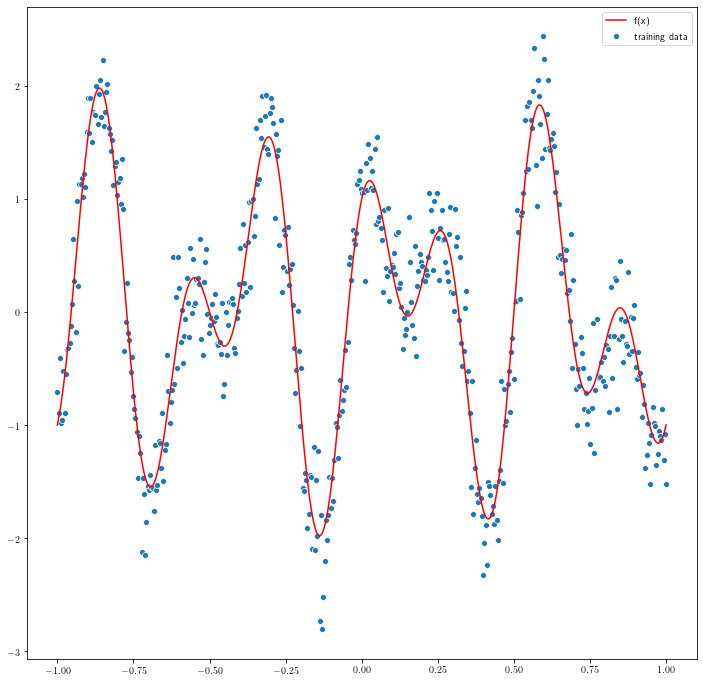

In [63]:
sns.scatterplot(x=X[:,0], y =Y[:,0], label='training data')
sns.lineplot(x=X[:,0], y = f_x[:,0], color='red', label='f(x)')

In [64]:
#### For a Demo, Lets partition the data

# Say we have test data 50 test points X_star
X_s = np.linspace(-1,1, 100)[:, None]

In [65]:
def prior(var, lengthscale, noF = 5):
    params = np.array([var, lengthscale])
    f, axes = plt.subplots(2, 1)
    ## Using rbf kernel, let visualize prior functions before seeing the data
    K_ss = cov_RBF(X_s, X_s, theta = params) + sigma_n*np.eye(X_s.shape[0])
    for i in range(0, noF):
        f_s = np.random.multivariate_normal(mean = np.zeros(shape =K_ss.shape[0]),cov= K_ss) #sample with zero means
        sns.lineplot(x = X_s[:, 0], y=f_s, color='blue', alpha=0.2, ax= axes[0])

    sns.lineplot(x=X[:,0], y=f_x[:,0], color='red', label='f(x)', ax= axes[0])
    sns.heatmap(data=K_ss, ax= axes[1])

In [66]:
interact(prior, noF = widgets.Dropdown(options=np.arange(1,51), value = 5),
        var = widgets.Dropdown(options=np.arange(.1,5.1, .1), value = 1)
        , lengthscale = widgets.Dropdown(options=np.arange(.1,5.1, .1), value = .2))

interactive(children=(Dropdown(description='var', index=9, options=(0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0…

<function __main__.prior(var, lengthscale, noF=5)>

### Now let us introduce the data and calculate the marginal 

$p_{\mathbf{f}}(\mathbf{y}_*|\mathbf{x}, \mathbf{y}, \mathbf{x}_*)$

#### Recall 

Now, for a test point $x_*$ we want to compute its output on the observed space, i.e. we want to compute $y_*$. Building on the noise model and the previously shown expressions, the posterior for the test outputs is given by:

$$
\mathbf{y}^* | \mathbf{x}, \mathbf{y}, \mathbf{x_*} \sim \mathcal{N}(\boldsymbol \mu_{\text{pred}},\mathbf{K}_{\text{pred}}) 
$$
with  
$$
\boldsymbol \mu_{\text{pred}} = \mathbf{K}_*^\top \left[\mathbf{K} + \sigma^2 \mathbf{I}\right]^{-1} \mathbf{y}
$$
and 
$$
\mathbf{K}_{\text{pred}} = \mathbf{K}_{*,*} - \mathbf{K}_*^\top \left[\mathbf{K} + \sigma^2 \mathbf{I}\right]^{-1} \mathbf{K}_*.
$$

In [67]:
def compute_posterior(var= 1, lengthscale = .2, noF = 10):
    params = np.array([var, lengthscale])  
    
    f, axes = plt.subplots(2, 1)
    params = np.array([var, lengthscale])
    # calculate the mean prediction 
    K = cov_RBF(X, X, theta = params) + sigma_n* np.eye(X.shape[0])

    #test for positive definite properties
    print((K==K.T).all())

    # #mean function
    K_Xs = cov_RBF(X,  X_s, theta =params) 
    alpha = np.dot(np.linalg.inv(K), Y)
    mean_s = np.dot(K_Xs.T,  alpha)



    # # covariance
    K_ss = cov_RBF(X_s, X_s, theta =params)
    

    temp = np.dot(np.linalg.inv(K), K_Xs)
    cov_mean_s = K_ss - np.dot(K_Xs.T, temp)
    
    #sample no_f functions of the posterior
    funcs = np.random.multivariate_normal(mean = mean_s[:,0], cov = cov_mean_s, size=noF).T
    funcs_std = np.apply_over_axes(func=np.std, a=funcs, axes=1).squeeze()
    for i in range(0, funcs.shape[1]):    
        sns.lineplot(x = X_s[:, 0], y=funcs[:, i], color='blue', alpha=0.2, ax= axes[0])
    sns.scatterplot(x = X.squeeze(), y = Y.squeeze(), label ="Data", ax= axes[0])
    sns.lineplot(x = X.squeeze(), y=f_x.squeeze(), color='red', label="f(x)", ax= axes[0])
    sns.lineplot(x = X_s.squeeze(), y=mean_s.squeeze()
                 , color='green', label="predicted $f^*(x)$", ax= axes[0])
    axes[0].fill_between(x = X_s.squeeze(), y1=(mean_s.squeeze()-2*funcs_std)
                         , y2 = (mean_s.squeeze()+ 2*funcs_std)
                         , color="#dddddd", label ="variance")
    
    sns.heatmap(data=cov_mean_s, ax= axes[1])

True


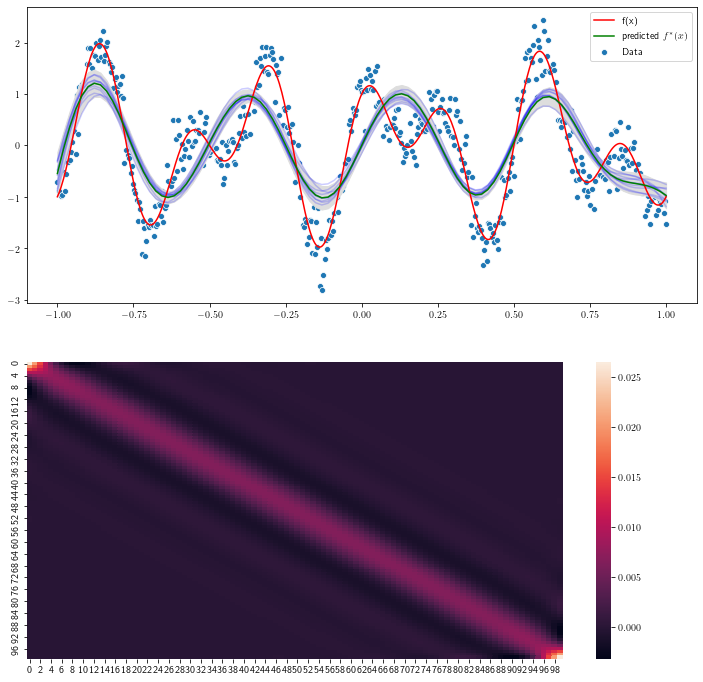

In [68]:
compute_posterior()

In [69]:
interact(compute_posterior, noF = widgets.Dropdown(options=np.arange(1,101), value = 5),
        var = widgets.Dropdown(options=np.arange(.1,5.1, .1), value = 1)
        , lengthscale = widgets.Dropdown(options=np.arange(.1,5.1, .1), value = .2))

interactive(children=(Dropdown(description='var', index=9, options=(0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0…

<function __main__.compute_posterior(var=1, lengthscale=0.2, noF=10)>

### Lets include some extrapolation points 

In [70]:
another_X_s = np.linspace(0,1.5, 100)[:, None]

In [71]:
def compute_posterior_another(var= 1, lengthscale = .2, noF = 10):
    params = np.array([var, lengthscale])  
    
    f, axes = plt.subplots(2, 1)
    params = np.array([var, lengthscale])
    # calculate the mean prediction 
    K = cov_RBF(X, X, theta = params) + sigma_n * np.eye(X.shape[0])

    #test for positive definite properties
    print((K==K.T).all())

    # #mean function
    K_Xs = cov_RBF(X,  another_X_s, theta =params) 
    alpha = np.dot(np.linalg.inv(K), Y)
    mean_s = np.dot(K_Xs.T,  alpha)



    # # covariance
    K_ss = cov_RBF(another_X_s, another_X_s, theta =params)
    

    temp = np.dot(np.linalg.inv(K), K_Xs)
    
    
    
    cov_mean_s = K_ss - np.dot(K_Xs.T, temp)
    
    #sample no_f functions of the posterior
    funcs = np.random.multivariate_normal(mean = mean_s[:,0], cov = cov_mean_s, size=noF).T
    funcs_std = np.apply_over_axes(func=np.std, a=funcs, axes=1).squeeze()
    for i in range(0, funcs.shape[1]):    
        sns.lineplot(x = another_X_s[:, 0], y=funcs[:, i], color='blue', alpha=0.2, ax= axes[0])
    sns.scatterplot(x = X.squeeze(), y = Y.squeeze(), label ="Data", ax= axes[0])
    sns.lineplot(x = X.squeeze(), y=f_x.squeeze(), color='red', label="f(x)", ax= axes[0])
    sns.lineplot(x = another_X_s.squeeze(), y=mean_s.squeeze()
                 , color='green', label="predicted $f^*(x)$", ax= axes[0])
    axes[0].fill_between(x = another_X_s.squeeze(), y1=(mean_s.squeeze()-2*funcs_std)
                         , y2 = (mean_s.squeeze()+ 2*funcs_std)
                         , color="#dddddd", label ="variance")
    
    sns.heatmap(data=cov_mean_s, ax= axes[1])

In [72]:
interact(compute_posterior_another, noF = widgets.Dropdown(options=np.arange(1,101), value = 5),
        var = widgets.Dropdown(options=np.arange(.1,5.1, .1), value = 1)
        , lengthscale = widgets.Dropdown(options=np.arange(.1,5.1, .1), value = .2))

interactive(children=(Dropdown(description='var', index=9, options=(0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0…

<function __main__.compute_posterior_another(var=1, lengthscale=0.2, noF=10)>

#### Observations and Advantages of GPs:   
- Full probabilistic model 
- It is not over confident. i.e, for extrapolation points (points far away from the training data), it reverts to its prior assumption (mean and variance) rather than confidently giving unrealistic predictions.
- Works very well for Time - series data 
- Works very well for active learning, bayesian optimization and online learning setting
- The GP model gives uncertainty in the fit/predictions (via mean and variance), shown as shaded area.  
- The GP model can be investigated before training (prior samples) or after training (posterior samples). The samples tell us "what sort of functions does that model consider".


### Disadvantages
- Time complexity - Computation of Kernel Matrix for the entire dataset can be expensive
    - Parallel computation resolves this (Computation of Kernel matrix is an embarassingly parallel problem, and symmetric nature of full rank matrix further reduces cost
    - Approximation (Sparse GPs) techniques also reduces this cost
- Space complexity - Storage of Kernels Matrix for large dataset can be expensive
    - Approximation techniques (Sparse GPs) tend to resolve this problem
- Determining what kernel to use - possible learning the kernels
    - Deep gaussian processes tend to resolve this.

# Part 4: Hyper-parameter Optimization

- The Kernel functions are often defined with parameters. Lets observe the RBF kernel for instance
- Recall 

$$
k_{RBF}(\mathbf{x}_{i,:},\mathbf{x}_{j,:}) = \sigma^2 \exp \left( -\frac{1}{2\ell^2} \sum_{d=1}^D (x_{i,q} - x_{j,q})^2\right)
$$

Together lets call these parameters $\Theta = \{\sigma, \ell, \sigma_y$ \} $

- **How do you choose these parameters (Model selection)**
    - One possible solution is to perform a grid search over the discrete values via Maximum likelihood
    - Hence, we optimize the **log** of the **maximum likelihood** density which is sometimes called the **evidence** as :
    $$
         \Theta^* = \arg \max_{\theta} \log p_\mathbf{f}(\mathbf{y}|\mathbf{x}) 
    $$
- Note: for gaussian likelihood this has an analytical solution


### Visualization (contour showing parameters space)
Lets Visualize the grid of this hyperparameters for RBF kernels on our model

In [41]:
def log_evidence(aPoint, var= 1, lengthscale = .2):
    params = np.array([var, lengthscale])  
    
    # calculate the mean prediction 
    K = cov_RBF(X, X, theta = params) + sigma_n * np.eye(X.shape[0])   
    
    marginal_mean = np.zeros(K.shape[0])[:, None]
    m =  np.log(multivariate_normal(aPoint, 1, marginal_mean, K))
    return m


In [42]:
def contour_hyperparameters():  
    # lets make a 2D mesh - plane
    X_1, X_2 = np.meshgrid(np.linspace(1e-6,1e+6,10), np.linspace(1e-6,1e+6,10))
    Z = np.empty(X_1.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = log_evidence(X, X_1[i,j], X_2[i,j])

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.contourf(X_1, X_2, Z, cm = cm.afmhot_r)
    ax.set_xlabel('variance')
    ax.set_ylabel('lengthscale')

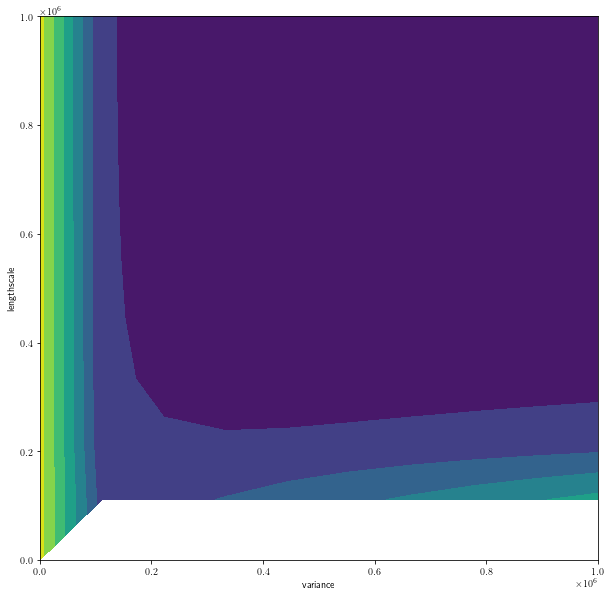

In [43]:
contour_hyperparameters()

In [44]:
#implement this
def log_evidence_testPoints(aPoint, var= 1, lengthscale = .2):
    pass

In [45]:
#implement this
def contour_hyperparameters_test_Points():  
    pass

In [46]:
contour_hyperparameters_test_Points()

In [47]:
# Try to optimize the evidence via MLE
from scipy.optimize import minimize




# Part 4: Using an existing GP library

A few famous Gaussian Processes library in python
- GPy by [https://sheffieldml.github.io/GPy/](Developed by Researchers at The University of Sheffield)
- Gaussian Processes [https://scikit-learn.org/stable/modules/gaussian_process.html](Sklearn Library)

## Using GPy library

Analysis of [AIM-94 ICU Time Series dataset](https://archive.ics.uci.edu/ml/datasets/ICU)

Analysis of AIM-94 ICU Time Series dataset

Here is the description of the patient that was observed:

8.5 month old female with biliary atresia, S/P (surgical procedure) Kasai procedure, ascending cholangitis with a history of multiple liver abscesses and portal hypertension. She was transferred to The Children's Hospital after a 15 day history of E. Coli sepsis, worsening despite antibiotic therapy and other supportive measures. She currently is in liver failure with coagulopathy. She has required mechanical ventilatory support due to the ARDS that followed the onset of sepsis.

Her admission body weight is 5 kg.

In addition to medications listed in data set, the patient receives:

Oral nystatin
Ativan 0.5 mg IV every 6 hours
Amphotericin bladder irrigation every 12 hours
Nebulized ventolin PRN
Maalox 10cc by nasogastric tube every 6 hours for gastric pH < 5


In [48]:
import pandas as pd
icu_data = pd.read_csv('./Data//aim94_map_data_for_DSA.csv',header=0)

In [49]:
icu_data.head()

,time_since_start,map
0,20,66
1,62,67
2,100,68
3,120,67
4,200,68


Now let's take a look at the patient time series. We'll focus our analysis on mean arterial pressure, the average pressure in a patient’s arteries during one cardiac cycle. The blue region from 35000 seconds up to the end of the time series will be set aside to test the predictions of our model.

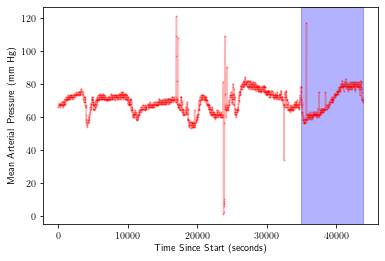

In [50]:
%matplotlib inline

end_of_series = np.max(icu_data.iloc[:,0].values)

plt.plot(icu_data.iloc[:,0].values,icu_data.iloc[:,1],'-o',color='r',alpha=0.3,markersize=1)
plt.xlabel('Time Since Start (seconds)')
plt.ylabel('Mean Arterial Pressure (mm Hg)')
plt.axvspan(35000,end_of_series,alpha=0.3,color='blue')

plt.show()

In [51]:
time_since_start = icu_data.iloc[:,0].values
map_values = icu_data.iloc[:,1].values

# we'll center the map values by substracting the mean
map_values = map_values - np.mean(map_values)

end_of_train = np.where(time_since_start >= 35000)[0][0]

train_X = np.expand_dims(time_since_start[:end_of_train],1)
train_Y = np.expand_dims(map_values[:end_of_train],1)
test_X = np.expand_dims(time_since_start[end_of_train:],1)
test_Y = np.expand_dims(map_values[end_of_train:],1)

In [52]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=10.)
m = GPy.models.GPRegression(train_X,train_Y,kernel)

In [53]:
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,10.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [54]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 3790.1195640654046
Optimization restart 2/10, f = 4499.073392966497
Optimization restart 3/10, f = 4499.073392966142
Optimization restart 4/10, f = 4499.0733929661355
Optimization restart 5/10, f = 4499.073392966137
Optimization restart 6/10, f = 4499.073392966138
Optimization restart 7/10, f = 4499.0733929661355
Optimization restart 8/10, f = 4499.073392966164
Optimization restart 9/10, f = 4499.073392966136
Optimization restart 10/10, f = 4499.073392966166


In [55]:
display(m)

GP_regression.,value,constraints,priors
rbf.variance,41.37458263135659,+ve,
rbf.lengthscale,79.48814171435603,+ve,
Gaussian_noise.variance,10.396753951985414,+ve,


(1291, 1)


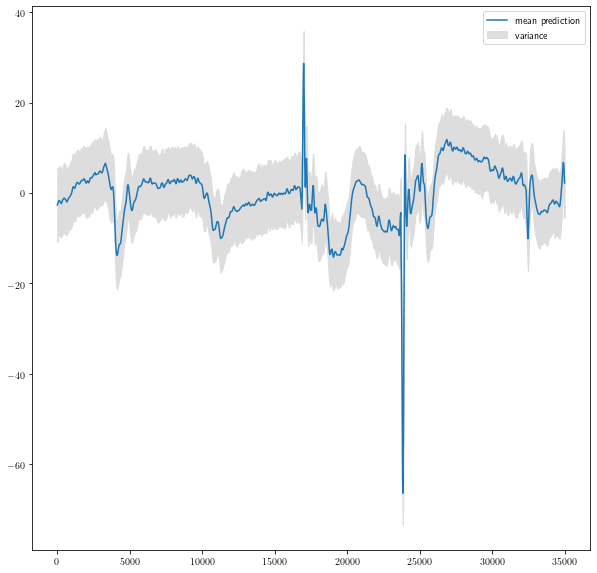

In [56]:
print (m.predict(train_X)[1].shape)
# predict method for GPy returns mean and variance

plt.figure(figsize=(10,10))
sns.lineplot(x=train_X[:,0], y=m.predict(train_X)[0][:,0], label="mean prediction")
std = np.sqrt(m.predict(train_X)[1])[:,0]
plt.fill_between(x = train_X[:,0], y1=(m.predict(train_X)[0][:,0]-2*std)
                         , y2 = (m.predict(train_X)[0][:,0]+ 2*std)
                         , color="#dddddd", label ="variance")
plt.legend()


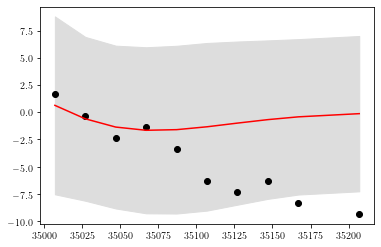

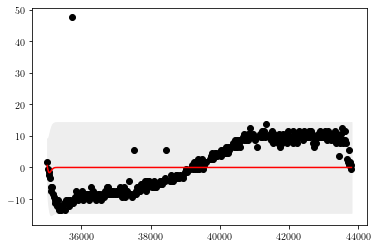

In [57]:
pred_Y,pred_Y_var = m.predict(test_X)

std_test =np.sqrt(pred_Y_var[:,0])

plt.plot(test_X[:10],test_Y[:10],'ok')
plt.plot(test_X[:10],pred_Y[:10],'-r')

plt.fill_between(x = test_X[:10,0], y1=(pred_Y[:10, 0]-2*std[:10])
                         , y2 = (pred_Y[:10, 0]+ 2*std[:10])
                         , color="#dddddd", label ="variance")


plt.figure()

plt.plot(test_X,test_Y,'ok')
plt.plot(test_X,pred_Y,'-r')



plt.fill_between(x = test_X[:,0], y1=(pred_Y[:, 0]-2*std_test)
                         , y2 = (pred_Y[:, 0]+ 2*std_test)
                         , color="#eeeeee", label ="variance")


plt.show()

## Using Sklearn library

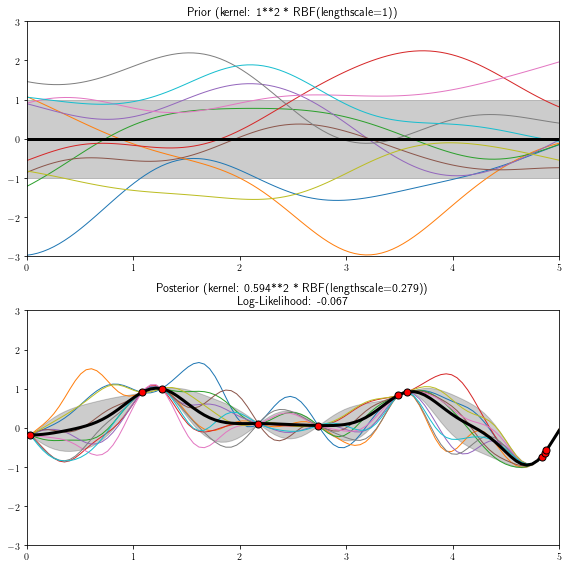

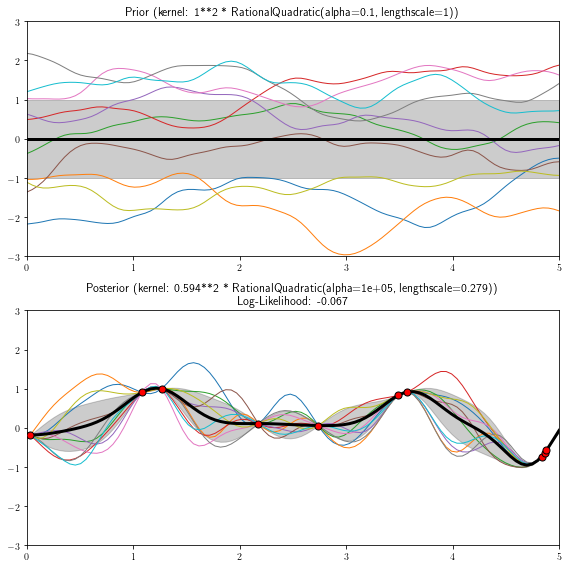

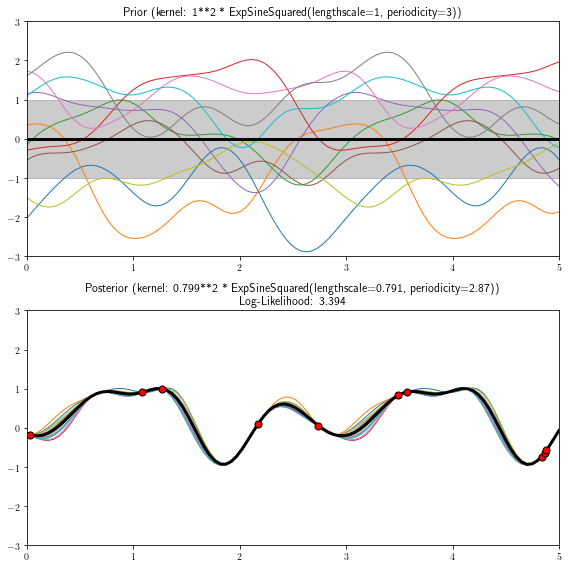

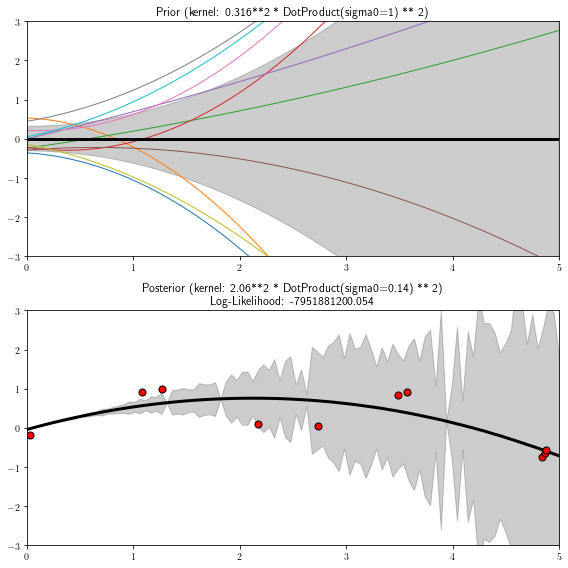

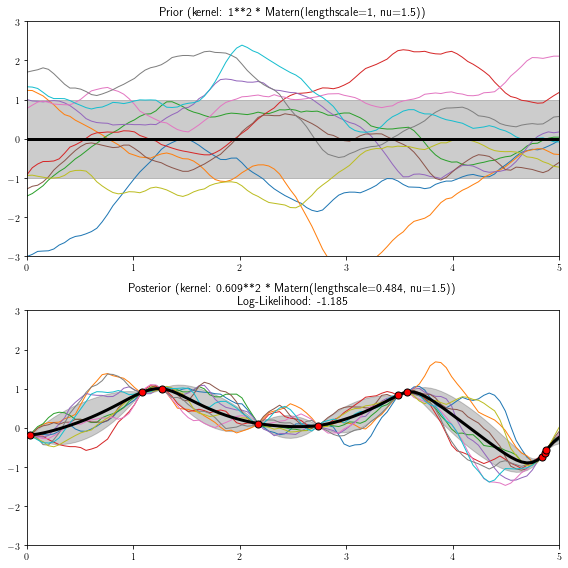

In [58]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)


kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

for kernel in kernels:
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)
    

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel.__str__().replace('_', ''), fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_.__str__().replace('_', '')
                 , gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

## References and Additional readings
- C. E. Rasmussen & C. K. I. Williams "Gaussian Processes for Machine Learning" - Great book on GPs
- Lecture note from Lehel Csato (http://www.cs.ubbcluj.ro/~csatol/) 
- Lecture notes from Neil Lawrence (http://inverseprobability).com
- Damianou, Andreas "Gaussian process introductory tutorial in Python" (https://t.co/Edp0UGT7Zr?amp=1): Great tutorials with code from scratch
- Kevin P. Murphy "Machine Learning - A Probabilistic Perspective"

### Appreciations
- Thanks to Andreas Damianou (http://www.andreasdamianou.com) for letting me used part of his notebooks.
- Thanks to Michael Mayhew for his contributions `Twitter: @DataForager`

Just some of the many helpful sources:
* GP book: http://www.gaussianprocess.org/gpml/ 
* Gaussian process summer school in Sheffield: http://gpss.cc/
* GPy software and tutorials: https://sheffieldml.github.io/GPy/
* Plenty of tutorials online on videolectures.net 

There are a few datasets in the folder "./Data/". You can play with it